In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats



In [13]:
# 1. Load the data
# Replace 'Real estate.csv' with the actual filename/path on your machine
df = pd.read_csv('Real estate.csv')

# 2. Quick overview
df.info()

# 3. Count any missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the near

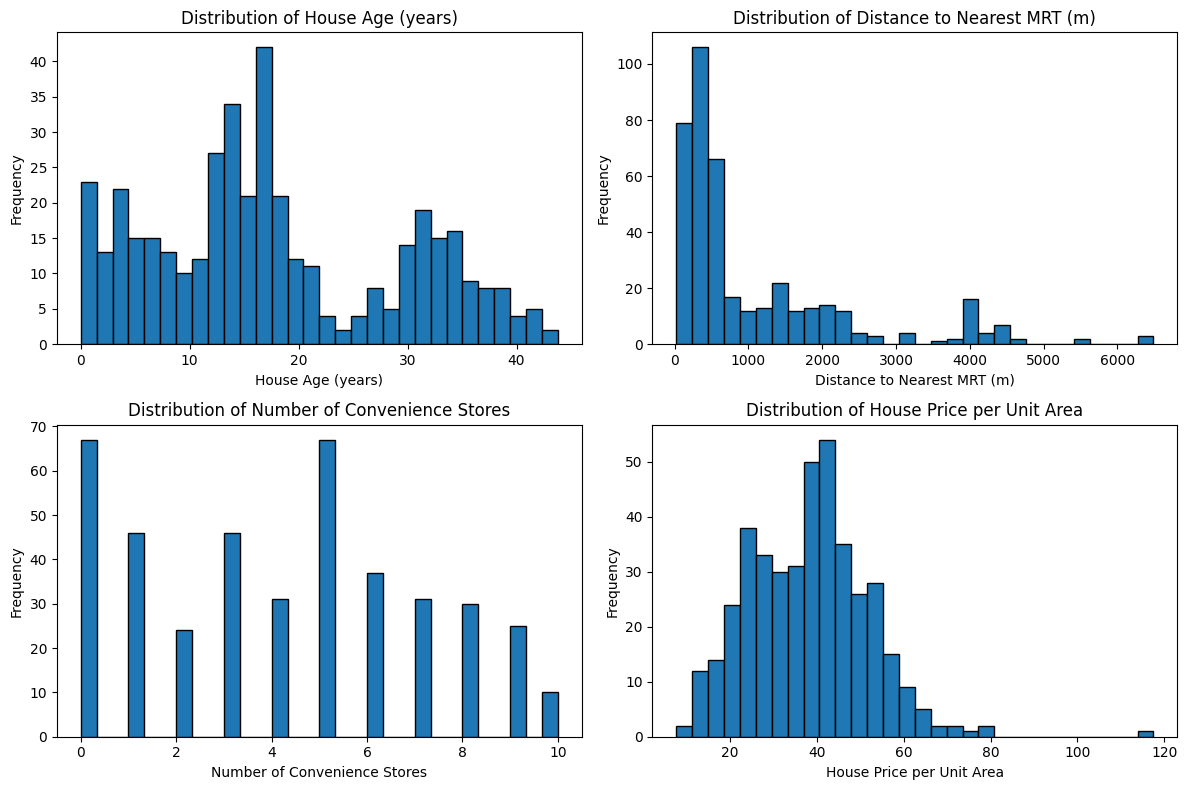

In [14]:
# Q2: Visualization
# List of columns to plot and their titles
cols = [
    ('X2 house age', 'House Age (years)'),
    ('X3 distance to the nearest MRT station', 'Distance to Nearest MRT (m)'),
    ('X4 number of convenience stores', 'Number of Convenience Stores'),
    ('Y house price of unit area', 'House Price per Unit Area')
]

# Create 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot each histogram
for ax, (col, xlabel) in zip(axes, cols):
    ax.hist(df[col], bins=30, edgecolor='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {xlabel}')

plt.tight_layout()
plt.savefig('histograms.png')
plt.show()


Slope (m): -0.0073
Intercept (b): 45.8514


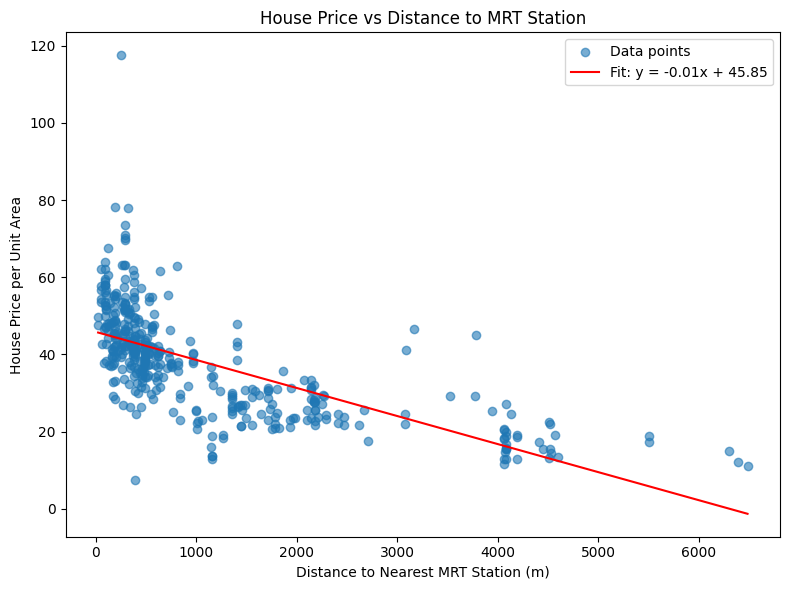

In [5]:
# Q3: Regression

# 1. Select X and Y
x = df['X3 distance to the nearest MRT station'].values
y = df['Y house price of unit area'].values

# 2. Compute means
x_mean = np.mean(x)
y_mean = np.mean(y)

# 3. Calculate slope (m) and intercept (b) manually
#    m = Σ[(x - x̄)(y - ȳ)] / Σ[(x - x̄)²]
#    b = ȳ – m·x̄
m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b = y_mean - m * x_mean

print(f"Slope (m): {m:.4f}")
print(f"Intercept (b): {b:.4f}")

# 4. Scatter + regression line
y_pred = m * x + b
sorted_idx = np.argsort(x)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, label='Data points')
plt.plot(x[sorted_idx], y_pred[sorted_idx], color='red', label='Fit: y = {:.2f}x + {:.2f}'.format(m, b))
plt.xlabel('Distance to Nearest MRT Station (m)')
plt.ylabel('House Price per Unit Area')
plt.title('House Price vs Distance to MRT Station')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Q4: Hypothesis Test

# Assuming x, y, m, b, x_mean, and y_pred are from Q3
n = len(x)
df = n - 2
alpha = 0.05

# 1. Compute residuals and estimate σ²
residuals = y - y_pred
sigma2 = np.sum(residuals**2) / df

# 2. Standard error of the slope
SE_m = np.sqrt(sigma2 / np.sum((x - x_mean)**2))

# 3. t-statistic for testing H0: slope = 0
t_stat = m / SE_m

# 4. Critical t-value for two-tailed test
t_crit = stats.t.ppf(1 - alpha/2, df)

print(f"t-statistic: {t_stat:.4f}")
print(f"Critical t-value (df={df}, α/2=0.025): ±{t_crit:.4f}")

# 5. Decision
if abs(t_stat) > t_crit:
    print("→ |t_stat| > t_crit  ⇒  Reject H₀ (there is a relationship).")
else:
    print("→ |t_stat| ≤ t_crit  ⇒  Fail to reject H₀ (no evidence of a relationship).")


t-statistic: -18.4997
Critical t-value (df=412, α/2=0.025): ±1.9657
→ |t_stat| > t_crit  ⇒  Reject H₀ (there is a relationship).


In [8]:
# Q5: Goodness of Fit

# Assuming y, y_pred, and y_mean are defined from Q3
# 1. Compute residual sum of squares (SS_res) and total sum of squares (SS_tot)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - y_mean) ** 2)

# 2. Compute R²
r2 = 1 - ss_res / ss_tot

# 3. Display result and interpretation
print(f"R-squared: {r2:.4f}")
print(f"This means that {r2*100:.2f}% of the variability in house price per unit area\n"
      f"is explained by the distance to the nearest MRT station in your simple linear model.")


R-squared: 0.4538
This means that 45.38% of the variability in house price per unit area
is explained by the distance to the nearest MRT station in your simple linear model.
